<a href="https://colab.research.google.com/github/dwishashah/Time-Series-Analysis/blob/main/Detecting_and_Detrending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Trend Using a HP Filter

## Exchange Rates Dataset

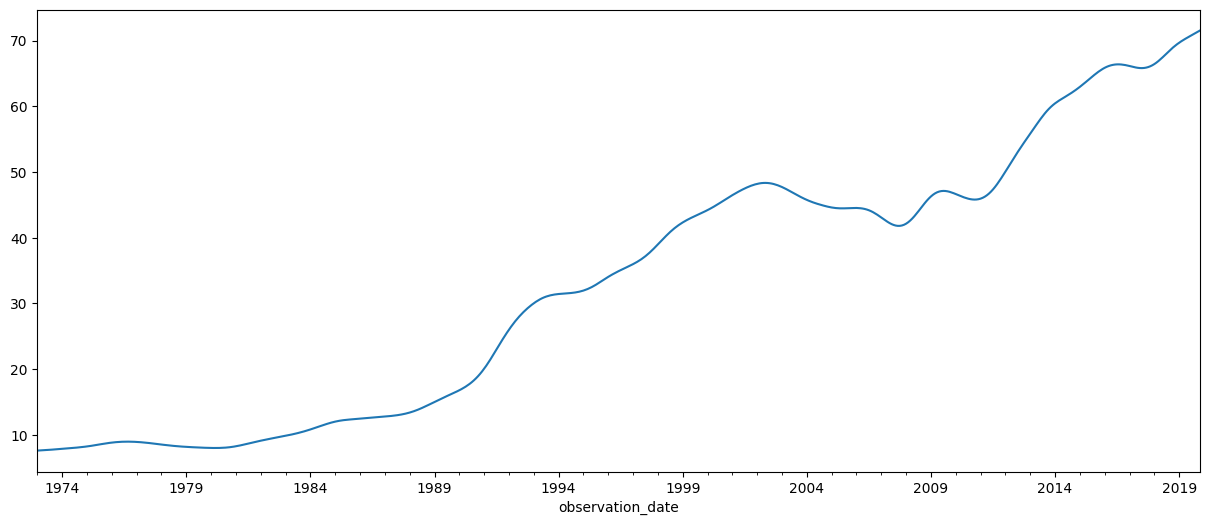

In [ ]:
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
df= pd.read_excel(r'India_Exchange_Rate_Dataset.xls',index_col=0,parse_dates=True)
EXINUS_cycle,EXINUS_trend= hpfilter(df['EXINUS'], lamb=1600)
EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

inference - graph trend is gradually increasing

## Shampoo Dataset

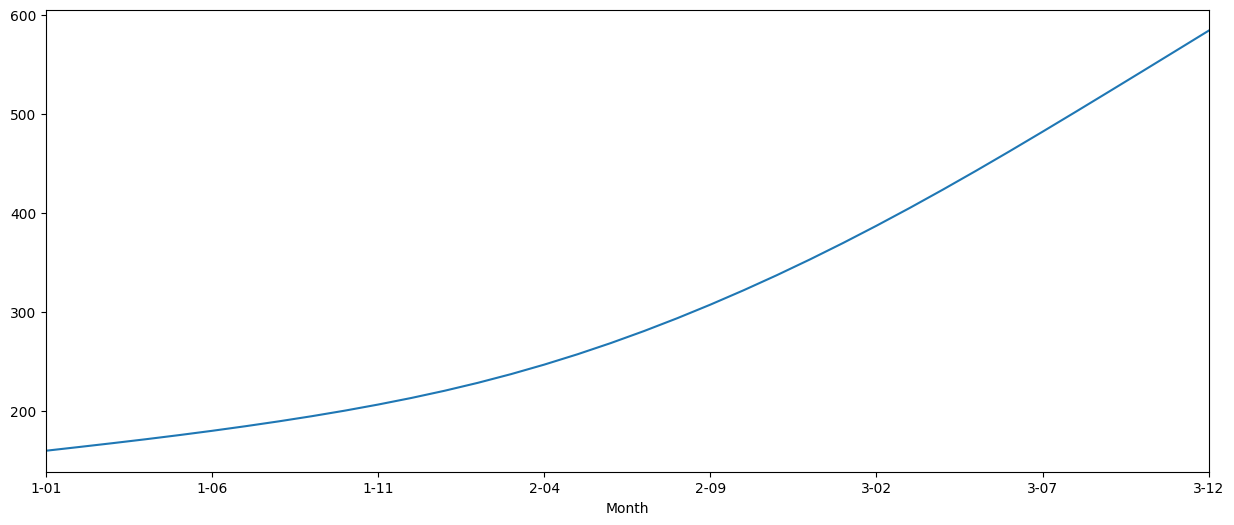

In [ ]:
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
df1= pd.read_csv(r'/content/shampoo.csv',index_col=0,parse_dates=True)
EXINUS_cycle,EXINUS_trend= hpfilter(df1['Sales'], lamb=1600)
EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

inference - graph trend is exponentially increasing

# Detrending Using Differencing(Pandas)

## Exchange Rates Dataset

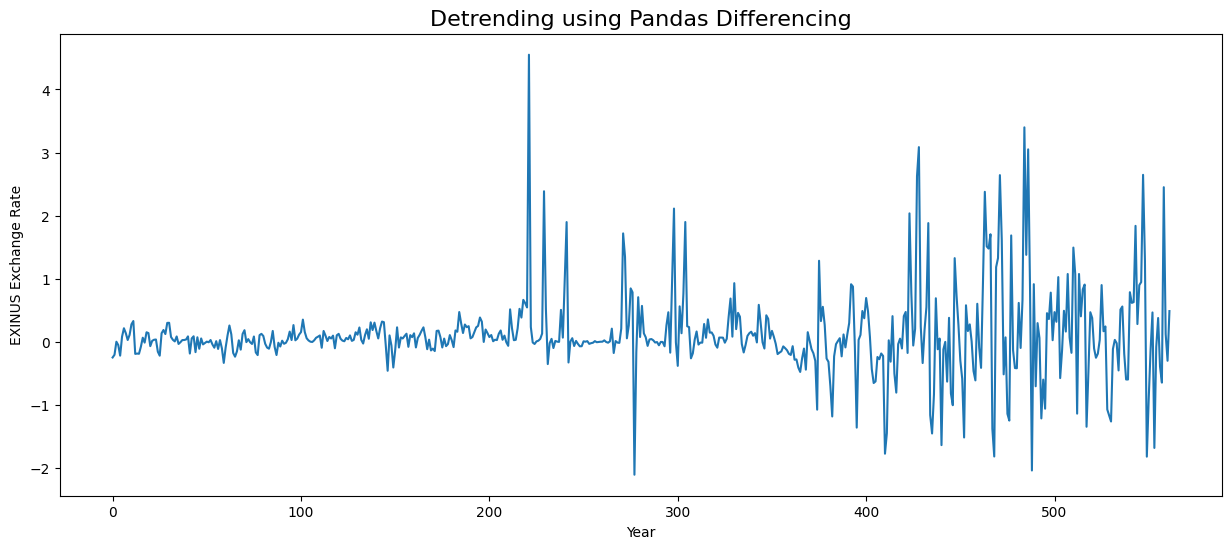

In [ ]:
X= df.values
diff= list()
for i in range(1, len(X)):
  value= X[i] -X[i-1]
  diff.append(value)
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS Exchange Rate')
plt.show()

Inference - The graph output suggests that the detrending process effectively removed any consistent long-term trend from the 'EXINUS Exchange Rate,' leaving behind short-term fluctuations around a relatively stable mean.

## Shampoo Dataset

<ipython-input-12-25dc31ff6492>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-12-25dc31ff6492>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze= True, date_parser= parser )


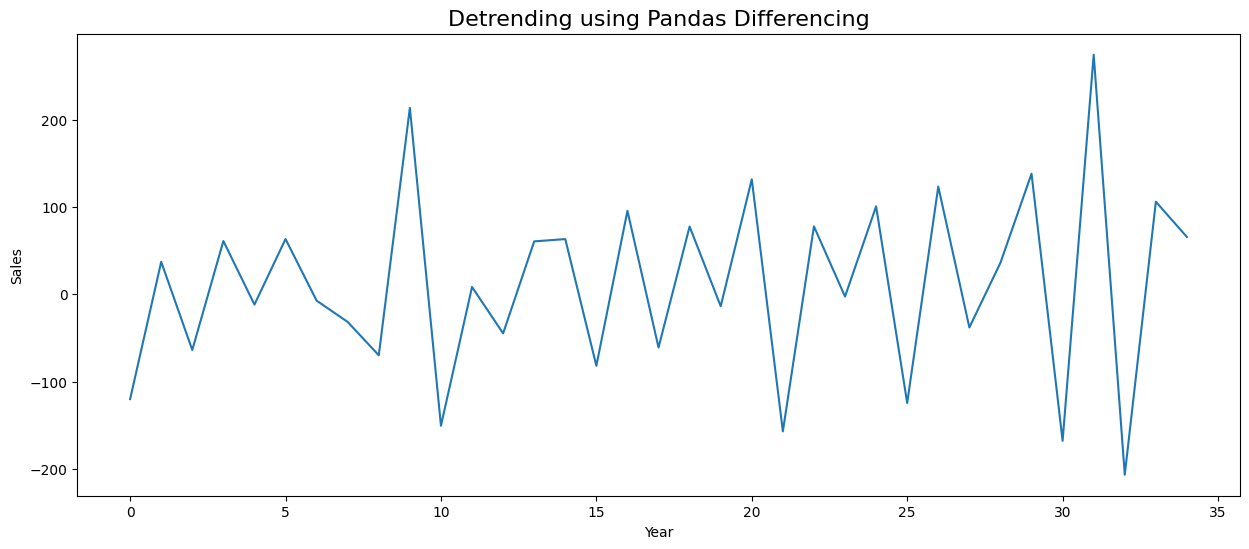

In [ ]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt

def parser(x):
  return datetime.strptime('190' + x , '%Y-%m')

series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze= True, date_parser= parser )

X= series.values
diff= list()
for i in range(1, len(X)):
  value= X[i] -X[i-1]
  diff.append(value)
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

Inference - The graph output indicates that the detrending process effectively removed any long-term trend or seasonality from the 'Sales' data, leaving behind short-term fluctuations in the sales figures over time.

# Detrending using Differencing (diff())

## Exchange Rates Dataset

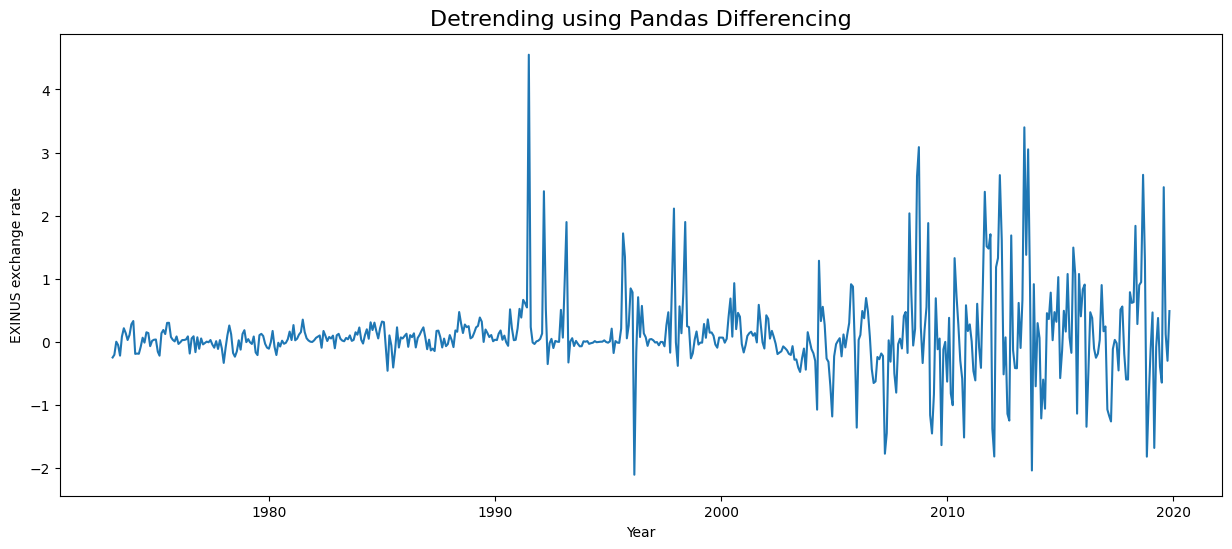

In [ ]:
diff= df.EXINUS.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

## Shampoo Dataset

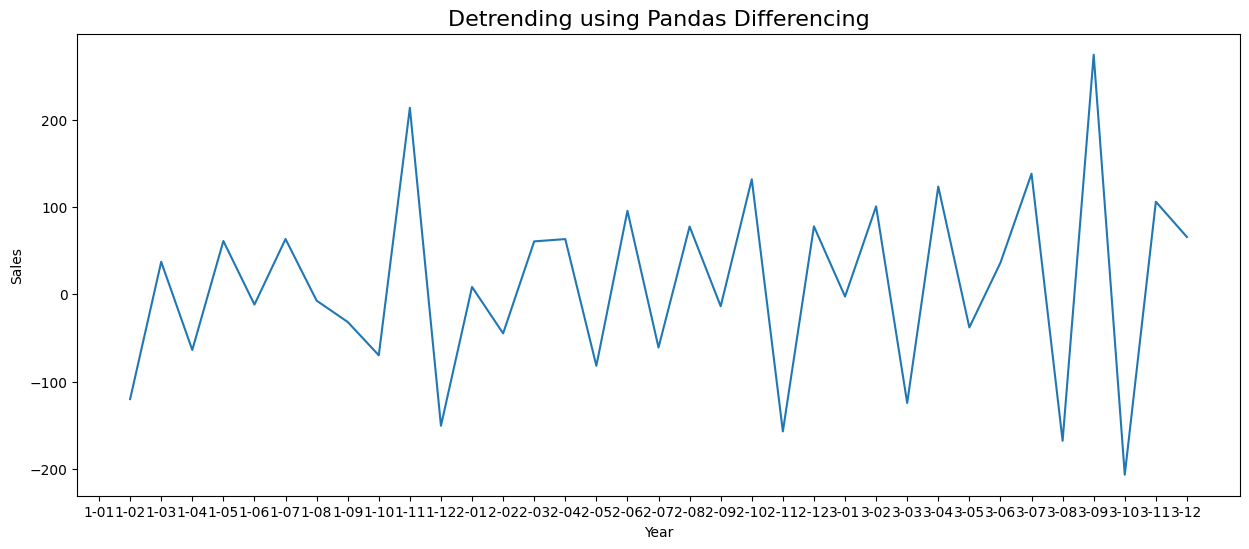

In [ ]:
diff= df1.Sales.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# Detrending using Differencing (SciPy)

## Exchange Rates Dataset

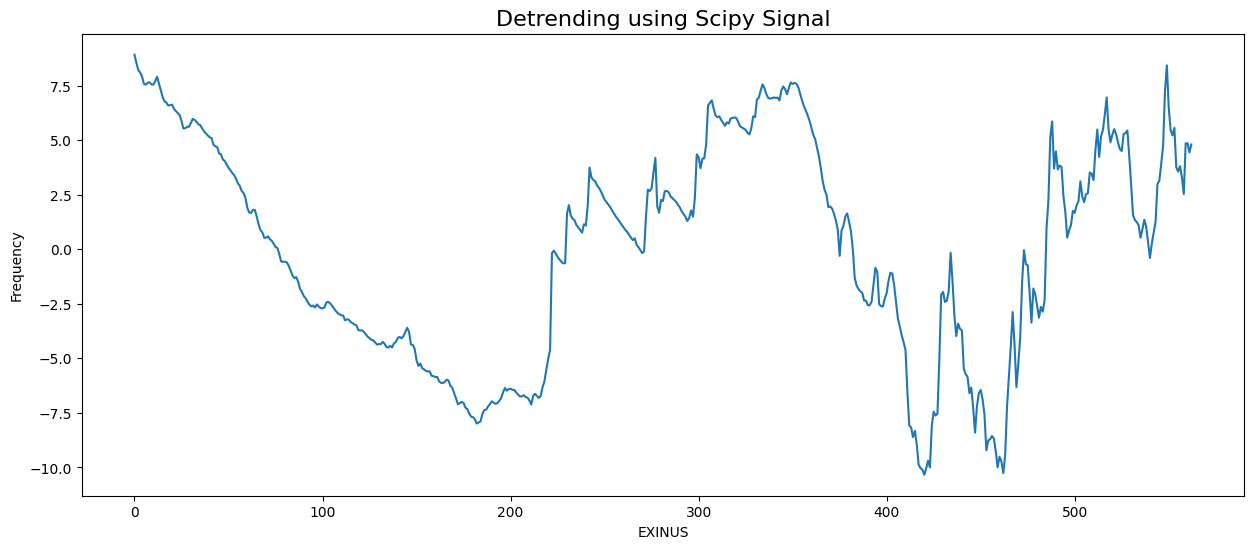

In [ ]:
from scipy import signal

detrended= signal.detrend(df.EXINUS.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

## Shampoo Dataset

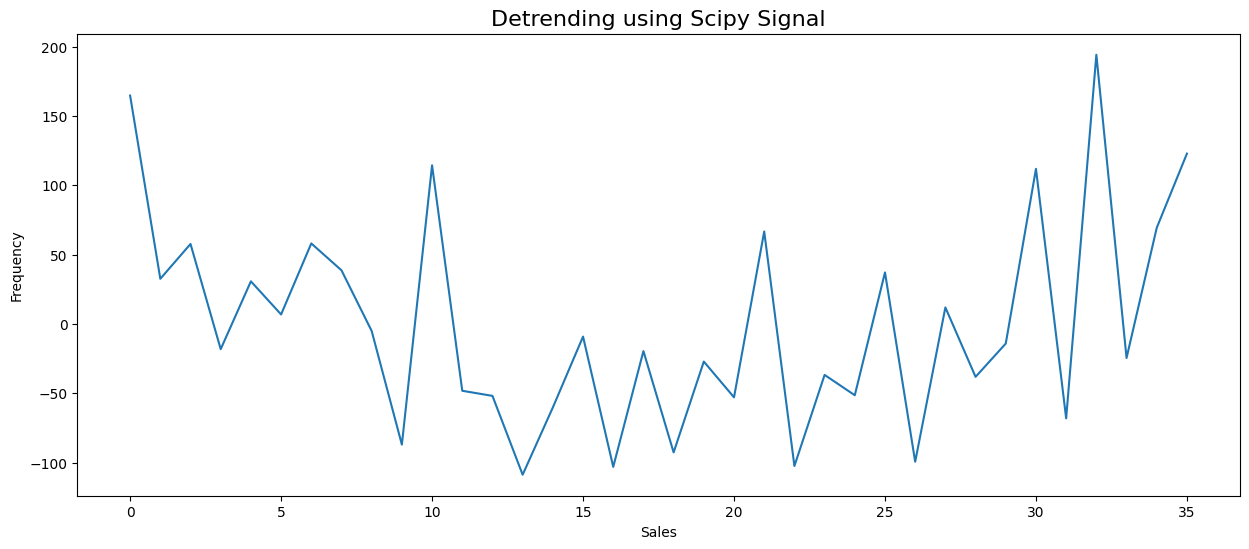

In [ ]:
from scipy import signal

detrended= signal.detrend(df1.Sales.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

# Detrending using HP Filter

## Exchange Rates Dataset

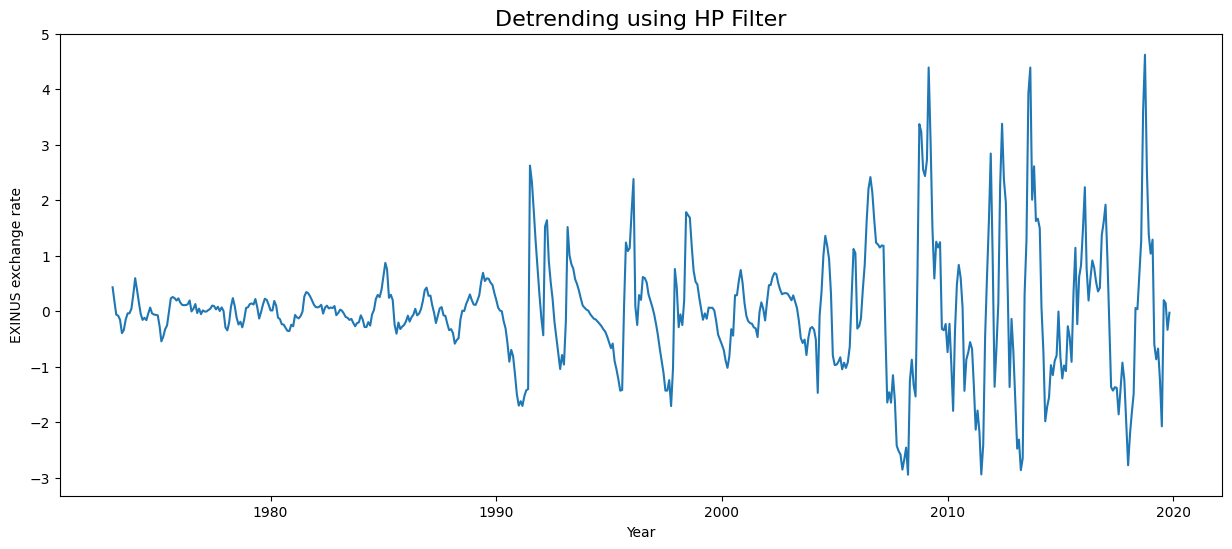

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
EXINUS_cycle,EXINUS_trend= hpfilter(df['EXINUS'], lamb=1600)

df['trend'] = EXINUS_trend
detrended= df.EXINUS -df['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

## Shampoo Dataset

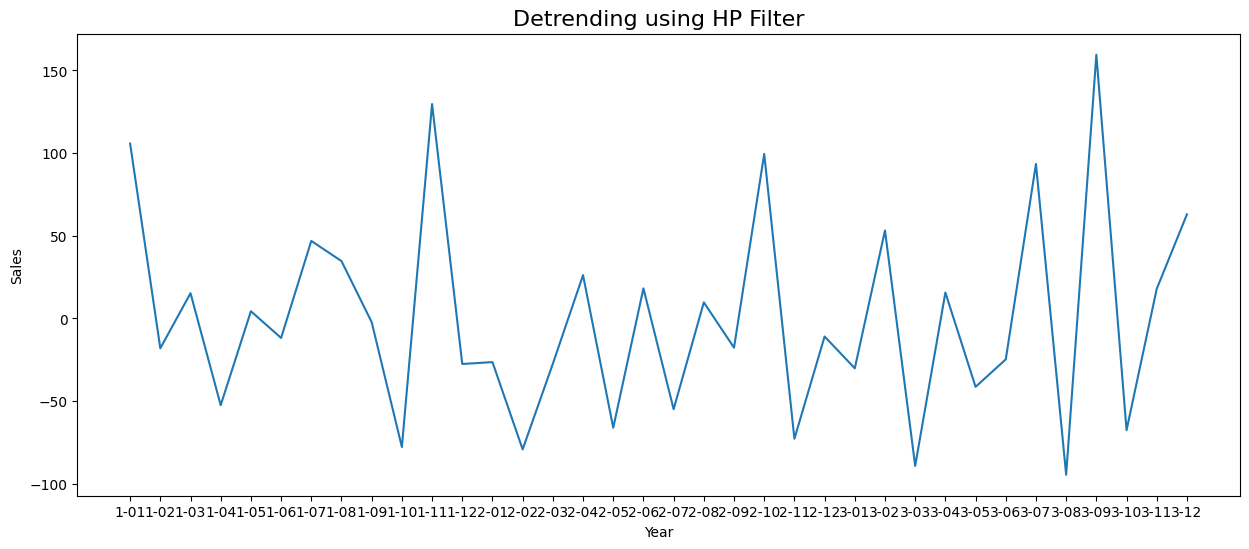

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
Sales_cycle,Sales_trend= hpfilter(df1['Sales'], lamb=1600)

df1['trend'] = Sales_trend
detrended= df1.Sales -df1['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()